# Generating Music Using Python From Scratch
Have you ever wondered how to generate music by a computer? When I was a kid, I got a digital watch. One of the fascinating features is its music library which includes the classical one, *Für Elise*. It seems that I can still hear this digital sound many years later. Today I am going to share the process to build a music generator from the basic using Python.

![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2022_04_15_19_The_sound_of_music.png)
"When you know the notes to sing, you can sing most anything."  -- The sound of music

## Preperations
To play sounds, I install simpleaudio by `pip install simpleaudio`. Another model is `Numpy` which is used for data processing. If you don't have it installed, you can also install it through `pip install numpy`

To start with, we import all the libraries we need.

In [1]:
import matplotlib.pyplot as plt
import simpleaudio as sa
import numpy as np
import time

## Store A Sine Wave
Tone is a kind of vibration with a fixed frequency. Different frequencies correspond different tones. Let's look at this sine wave $y = \sin (2\pi f t)$, where $f=440$ is frenquency in hertz (Hz). 

In [2]:
fs = 8000
ts = np.linspace(0, 1, fs, False)
freq = 440
amplitudes = np.sin(2 * np.pi * freq * ts)

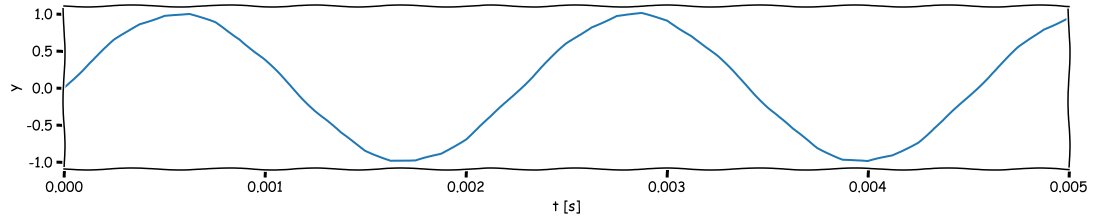

In [3]:
plt.xkcd()
plt.figure(figsize=(18,3))
plt.xlabel('t [s]')
plt.ylabel('y')
plt.xlim(0, 0.005)
plt.plot(ts, amplitudes)
plt.show()

This figure show how this wave looks like in the range of $t \in [0, 0.05]$. Here $y$ is a continous function. It's impossible to save all $y$ for every point of time $t$. Therefore, we can convert this sine wave into a sequence of "samples" like the following. 

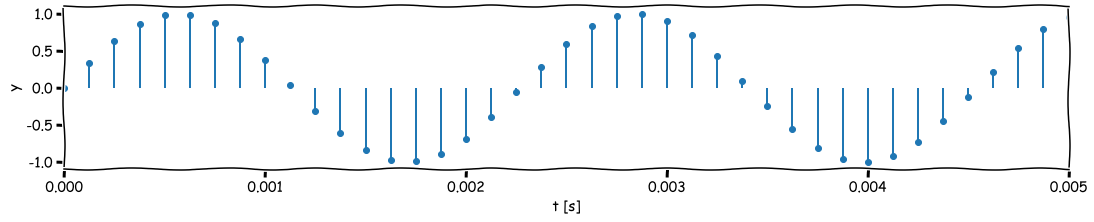

In [4]:
from matplotlib import collections as matcoll
lines = []
for i in range(ts.size):
    pair=[(ts[i],0), (ts[i], amplitudes[i])]
    lines.append(pair)
linecoll = matcoll.LineCollection(lines)

plt.xkcd()
fig, ax = plt.subplots(figsize=(18,3))
ax.add_collection(linecoll)

plt.xlabel('t [s]')
plt.ylabel('y')
plt.xlim(0, 0.005)
plt.scatter(ts, amplitudes)
plt.show()

This figure is the result of sampling 8000 points evenly during a second (s). Usually we call this number **sampling rate**. You may ask, "Is this how computer store this sine wave for sound?" Well, not exactly. You may have noticed that the values of $y$ are in the range from -1 to 1, which indicating most of $y$ values are floating number. However, it is much more easy to store these values as integers. 

In the computer world, we only have 0 and 1. The minimum storage unit in computer is called bit.  If I have one bit for storing, I can only store either 0 or 1. If I have two bits, I have four choices, $00_2$, $01_2$, $10_2$ and $11_2$, which correspond to 0, 1, 2, 3 in decimal system. (Here I use $xx_2$ to indecate $xx$ is a binary number.)  What about 3 bits, or 8 bits? You can try on yourself. It turns out there are $2^n$ choices for a $n$ bits storage. To make our life easier, we usually call 8 bits a byte, i.e., **1 byte equals to 8 bits**. Therefore you have $2^8 = 256$ choices in this byte storage range from 0 to 255. What if I use one bit to indecate the sign of this stored number? I mean, for example,  we can set it to 0 for a positive number and 1 for a negative number.  What is range of number a byte can represent? This is how I consider this question. As one bit has been occupied, so I have 7 bits to use. The largest number I can represent in 7 bits storage is $1111111_2$ which is 127 in decimal. If the sign bit is 1, this number is -127.  Thus,  a byte can represent integer numbers ranges from -127 to 127. 

Let's say the given storage for each $y$ value is a byte.  How can you represent the above sine wave? I'd like to say map the range $[-1, 1]$ to $[-127, 127]$ is a pretty strightfoward idea. 

In [5]:
audio = amplitudes * (2**7 - 1)
audio = audio.astype(np.int8)

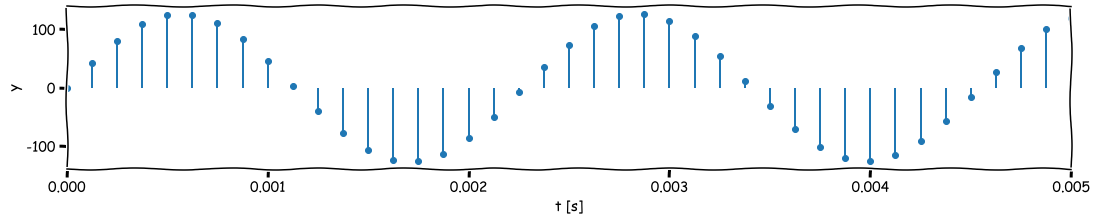

In [6]:
from matplotlib import collections as matcoll
lines = []
for i in range(ts.size):
    pair=[(ts[i],0), (ts[i], audio[i])]
    lines.append(pair)
linecoll = matcoll.LineCollection(lines)

plt.xkcd()
fig, ax = plt.subplots(figsize=(18,3))
ax.add_collection(linecoll)

plt.xlabel('t [s]')
plt.ylabel('y')
plt.xlim(0, 0.005)
plt.scatter(ts, audio)
plt.show()

Compare this figure to the former one, you can see the wave shape doesn't change much, while the $y$ range changes to $[-127, 127]$. Actually, another change which is hard to tell is the $y$ values changes to integers as we have used a method to force floating numbers to integers.  We should notice that this kind of conversion definitely brings some errors.  By the way,  the number of bits we choose to store $y$ values is called **bit depth** in digital audio, which directly corresponds to the resolution of each sample. .

## Listen to the sine wave
Let hear what this sine wave sounds like.

In [7]:
def savewave(audio, name, channels, samplewidth, framerate):
    '''Save data to a wave file'''
    import wave
    with wave.open(name, "w") as f:
        f.setnchannels(channels)
        f.setsampwidth(samplewidth)
        f.setframerate(framerate)
        f.writeframes(audio.tobytes())

In [8]:
# bit depth: 8; sampling rate 8000
fs = 8000
ts = np.linspace(0, 1, fs, False)
freq = 450
amplitudes = np.sin(2 * np.pi * freq * ts)
audio = amplitudes * (2**7 - 1)
audio = audio.astype(np.int8)
play_object = sa.play_buffer(audio, 1, 1, fs)
savewave(audio, "8bit-450hz.wav", 1, 1, 8000)

<p align="center">
<audio ref='themeSong' src="8bit-450hz.wav" controls  preload></audio>
</p>

In [9]:
# bit depth: 16; sampling rate 8000
fs = 8000
ts = np.linspace(0, 1, fs, False)
freq = 450
amplitudes = np.sin(2 * np.pi * freq * ts)
audio = amplitudes * (2**15 - 1)
audio = audio.astype(np.int16)
play_object = sa.play_buffer(audio, 1, 2, fs)
savewave(audio, "16bit-450hz.wav", 1, 2, 8000)

<p align="center">
<audio ref='themeSong' src="16bit-450hz.wav" controls  preload></audio>
</p>

In [10]:
# for i in range(10):
#     play_object = sa.play_buffer(audio, 1, 2, fs)
#     time.sleep(5)

You can hear the two sound clips are very different bacause of the bit depth. The second clip with 16 bits depth sound much more soft than the 8 bits depth clip. Now we know how to generate sound, let make some music.

## Volume
**The volume or the loudness of a sound is represented as the amplitude**. A high amplitude produces a loud sound and a low amplitude produces a quiet sound. 

In [11]:
# Loud 
volume = 0.8
fs = 8000
ts = np.linspace(0, 1, fs, False)
freq = 450
amplitudes = np.sin(2 * np.pi * freq * ts)
audio = amplitudes * (2**15 - 1)
audio = volume * audio
audio = audio.astype(np.int16)
play_object = sa.play_buffer(audio, 1, 2, fs)

In [12]:
# quiet
volume = 0.2
fs = 8000
ts = np.linspace(0, 1, fs, False)
freq = 450
amplitudes = np.sin(2 * np.pi * freq * ts)
audio = amplitudes * (2**15 - 1)
audio = volume * audio
audio = audio.astype(np.int16)
play_object = sa.play_buffer(audio, 1, 2, fs)

## Create the basic notes
We create the basic botes in the 4-th octave based on **[equal temperamen](https://en.wikipedia.org/wiki/Equal_temperament)**.  There are twelve notes in each octave： `C` ,`C#`,`D` ,`D#`,`E` ,`F` ,`F#`,`G` ,`G#`, `A`, `A#` and `B`.  Each note corresponds a frequency. All these frequencies constitute a **geometric progression**, where each term after the first is found by multiplying the previous one by a fixed number. For example, we know the frequency of note `A` is 440 hz. To get the frequency of the next note `A#`, we can multiply 440 by a magic number $2^{1/12}$ so that we know the frequency of `A#` which is 440$\times2^{1/12}$ = 466.2 hz.  Similarly, we can get all the frequencies of ther notes. By the way, this is magic number is called **common ratio** in geometric progression. 

Up till now, we are talking about the notes in the 4-th octave. You probabaly want to ask, what about the notes in other octave? Well, good question. Here we use the format like `A4` to reprent the note `A` in the 4-th octave. It turns out it is very easy to get the frequency of `A5`. You just need to double the frequency of `A4` to obtain the frequency of `A5`, i.e., 440$\times2$ = 880 hz. You can use the same method to get the frequencies of all other notes.  When you know `A`, you know everthing. That pretty cool, right?

In [13]:
ns = np.arange(-9, 3)
frequencies = 440 * 2**(ns/12)
note_names = ["C" ,"C#","D" ,"D#","E" ,"F" ,"F#","G" ,"G#", "A", "A#", "B"]
Notes = {note_names[i]:frequencies[i] for i in range(ns.size)}

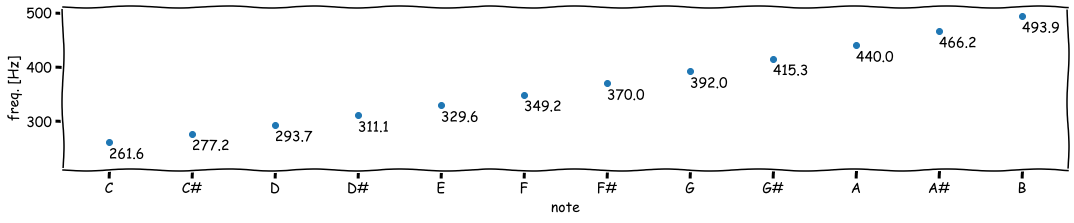

In [14]:
plt.xkcd()
fig, ax = plt.subplots(figsize=(18,3))
plt.xlabel('note')
plt.ylabel('freq. [Hz]')
plt.ylim(210, 510)
plt.scatter(note_names, frequencies)
for i in range(12):
    ax.annotate('{:.1f}'.format(frequencies[i]), (note_names[i], frequencies[i] - 30))
plt.show()

## Play Notes
Here we create a function to play notes. Besids, like sometimes we want to rest, a symbol `O` is used to indecate the absence of sound.

In [15]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

In [16]:
has_numbers('E4')

True

In [17]:
def play(note, fs=8000, duration=0.5, volume=1):
    global Notes
    t = np.linspace(0, duration, int(duration * fs), False)
    if note != 'O':
        if has_numbers(note):
            octave = int(note[-1])
            frequency = Notes[note[:-1]]
            frequency = frequency * 2**(octave - 4)
        else:
            frequency = Notes[note]   # 4-th octave by defaut
        audio = np.sin(2 * np.pi * frequency * t)
        audio = audio * (2**15 - 1)  / np.max(np.abs(audio))
    else:
        audio = np.zeros(int(duration * fs)) # rest
    audio = volume * audio
    audio = audio.astype(np.int16)
    play_object = sa.play_buffer(audio, 1, 2, fs)

In [18]:
#  Play C4 note
play('C')  # the same as play('C4')

In [19]:
# Play multiple  notes at the 'same' time
play('C')
play('E4')
play('G4')

In [20]:
# Rest, nothing played
play('O')

Ignoring the notes with sharp symbol `#`, we get notes `C`, `D`, `E`, `F`, `G`, `A` and `B`, corresponding to `Do`, `Re`, `Mi`, `Fa`, `Sol`, `La` and `Ti`. These notes make up **C major scale**, which sounds like this.

In [23]:
for note in ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C5', 'B', 'A', 'G', 'F', 'E', 'D', 'C']:
    play(note)
    time.sleep(0.5)

## Für Elise
Let's try to play Für Elise. You can find the sheet [Here](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2022_04_13_20_g6YGx7.jpg) Another important attribute for a note is its **duration**, which is the length the sound lasts for.   A longer duration means that you hear the sound for longer. Here, we use `E5-4` to indicate this is a `E` note in the 5-th octave which lasts for **one quarter** of the duration of a whole note. Similarly, `E5-8` is to say this is a `E` note in the 5-th octave which lasts for **one eighth** the duration of a whole note. If the duration of a whole note is 4 seconds, then a quarter note lasts for a sencond, and an eighth note lasts for half a second.  Besides, to record the music notes more clearly, we use a `|` to represent a bar (measure) line.

In [24]:
for_elise = ['E5-8', 'D#5-8', '|', \
                    'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|',\
                    'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|', \
                    'B-4', 'O-8', 'E-8', 'G#-8', 'B-8', '|', \
                    'C5-4', 'O-4', 'E5-8', 'D#5-8', '|', \
                    'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|',\
                    'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|', \
                    'B-4', 'O-8', 'E-8', 'C5-8', 'B-8', '|', \
                    'A4-4', 'O-4', 'E5-8', 'D#5-8', '|']

In [25]:
def playSheet(sheet, tempo=120):
    for sign in sheet:
        if sign == '|':
            continue
        if '-' in sign:
            note, note_type= sign.split('-')
            note_type = int(note_type)
        else:
            note = sign
            note_type = 4 # 4-th note as default
        play(note)
        time.sleep( (60/tempo)*(4/note_type))

In [26]:
playSheet(for_elise)

As there are some sections should be repeated, we add `|:` and `:|` to represent the left and right repeat signs, respectively. Then, we make some changes to the function of `playSheet` to make repeat signs work.

In [27]:
for_elise = \
['E5-8', 'D#5-8', '|:', 'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|', 'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|',  'B-4', 'O-8', 'E-8', 'G#-8', 'B-8', '|', 'C5-4', 'O-4', 'E5-8', 'D#5-8', '|',  'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|',\
 'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|', 'B-4', 'O-8', 'E-8', 'C5-8', 'B-8', '|', 'A-4', 'O-4', 'E5-8', 'D#5-8', ':|', 'A-4', 'O-8', 'B-8', 'C5-8', 'D5-8', '|:', 'E5-4', 'O-8', 'G-8', 'F5-8', 'E5-8', '|',\
 'D5-4', 'O-8', 'F-8', 'E5-8', 'D5-8', '|', 'C5-4', 'O-8','E-8', 'D5-8', 'C5-8',  '|', 'B-4', 'E5-8', 'E3-8', 'E-8', 'E-8', '|', 'E5-8', 'E-8', 'E5-8', 'D#-8', 'E-8', 'D-8', '|', 'E-8', 'D#-8', 'E-8', 'D#5-8',  'E-8', 'D-8', '|', \
 'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|', 'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|', 'B-4', 'O-8','E-8','G#-8','B-8','|','C5-4','O-4','E5-8','D#5-8', '|', 'E5-8','D#5-8','E5-8','B-8','D5-8','C5-8','|',\
 'A-4','O-8','C-8','E-8','A-8','|','B-4','O-8', 'E-4', 'C5-8','B-8','|','A-4','O-8','B-8','C5-8','D5-8', ':|', 'A-4', 'O-2']

In [28]:
def last_bar_index(sheet):
    '''
    This function is use to determine the index of  last bar sign
    '''
    max_index = len(sheet)-1
    for i,sign in enumerate(reversed(sheet)):
        if sign=='|':
            return max_index - i     
#  Test
# li = ['E5-8', 'D#5-8', '|',  'E5-8', 'D#5-8', '|', 'E5-8']
# idx = last_bar_index(li)
# li[:idx]

In [29]:
record_clip=[]
record_status = False
def playSheet(sheet, tempo=120):
    global record_clip, record_status
    for sign in sheet:
        # print(sign, record_status)
        if record_status == True:
            record_clip.append(sign)
        if sign == '|:':
            record_status = True
            continue
        if sign == ':|' and record_status == True:
            record_status = False
            record_clip = record_clip[:last_bar_index(record_clip)]
            playSheet(record_clip, tempo=tempo)
            record_clip = []
            continue
        if sign == '|':
            continue
        if '-' in sign:
            note, note_type= sign.split('-')
            note_type = int(note_type)
        else:
            note = sign
            note_type = 4 # 4-th note as default
        play(note)
        time.sleep( (60/tempo)*(4/note_type))

In [30]:
playSheet(for_elise)

## Fade in and out 
You may noticed that there are some click sounds at the beging and the end of a note. To smooth the trasitions, we can create an envelope, which gives you fine control over the amplitude of the sound. It’s like giving someone instructions on how to turn up and down the volume of a guitar amplifier. For example you might ask someone to “start at silence, slowly move up to full volume, hold it for a bit, then quickly fall back to silence.” This kind of envelope is called ADSR envelope, where ADSR represents four phase, attack, decay, sustain, and release. Here, for simplicity, we just use three of them, attack, sustain and release. In the attack phase, the volume goes up from 0 to 1. In the sustain phase, the volume keeps to 1. And in the release phase, the volume goes down from 1 to 0. Using the attack and rerlase phases, we can fade the note sound in and out.

In [31]:
duration = 1

In [32]:
ts = np.linspace(0, duration, duration*fs, False)

In [33]:
attack = 0.1
release = 0.2

In [34]:
def get_envelope(attack=0.1, release=0.2, duration=1, fs=8000):
    ts = np.linspace(0, duration, int(duration*fs), False)
    ts_attack = ts[ts<attack]
    ts_sustain =  ts[np.logical_and(ts>=attack, ts<(duration - release))]
    ts_release = ts[ts>= duration-release]
    amplitude_attack = ts_attack/attack
    amplitude_sustain = np.ones_like(ts_sustain)
    amplitude_release = -ts_release/release + duration / release
    amplitude_envelope = np.concatenate([amplitude_attack, amplitude_sustain, amplitude_release])
    return ts, amplitude_envelope

In [35]:
ts, amplitude_envelope = get_envelope(attack=0.2, release=0.5, duration=1, fs=100)

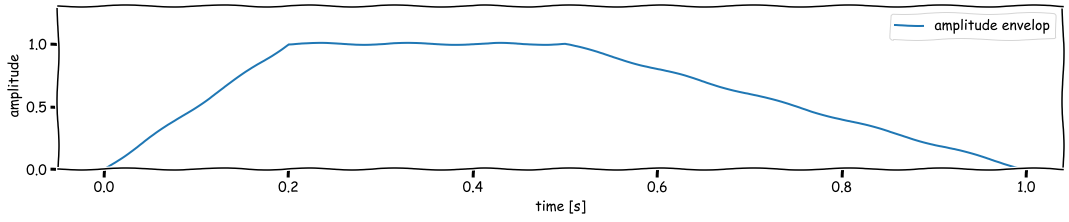

In [36]:
plt.xkcd()
fig, ax = plt.subplots(figsize=(18,3))
plt.xlabel('time [s]')
plt.ylabel(' amplitude')
plt.ylim(0,1.3)
ax.plot( ts, amplitude_envelope, label='amplitude envelop')
plt.legend(loc='upper right')
plt.show()

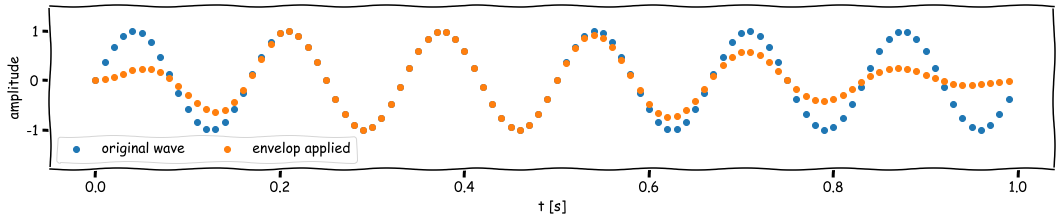

In [37]:
freq = 6
amplitudes = np.sin(2 * np.pi * freq * ts)
fig, ax = plt.subplots(figsize=(18,3))
plt.xlabel('t [s]')
plt.ylabel('amplitude')
plt.ylim(-1.8, 1.5)
plt.scatter(ts, amplitudes, label='original wave')
plt.scatter(ts, amplitudes*amplitude_envelope, label='envelop applied')
plt.legend(loc='lower left', ncol=2)
plt.show()

In [38]:
def play(note, fs=8000, duration=1, volume = 0.8, attack=0.01, release=0.3):
    global Notes
    t = np.linspace(0, duration, int(duration * fs), False)
    if note != 'O':
        if has_numbers(note):
            octave = int(note[-1])
            frequency = Notes[note[:-1]]
            frequency = frequency * 2**(octave - 4)
        else:
            frequency = Notes[note]   # 4-th octave by defaut
        audio = np.sin(2 * np.pi * frequency * t)
        audio = audio * (2**15 - 1)  / np.max(np.abs(audio))
    else:
        audio = np.zeros(int(duration * fs)) # rest
    _ , amplitude_envelope = get_envelope(attack=attack, release=release, duration=duration, fs=fs)
    audio = amplitude_envelope * audio
    audio = volume * audio
    audio = audio.astype(np.int16)
    play_object = sa.play_buffer(audio, 1, 2, fs)

You can hear the difference before and after applying the amplitute envelop.

In [39]:
# Play E without attack and  release phase
play('E', attack=0, release=0.000000001)

In [40]:
# Play E with attack and  release phase
play('E', attack=0.01, release=0.1)

Then let's play Für Elise again. 

In [41]:
#  Play 
playSheet(for_elise)

## Capo
When we play guitar, we can use a capo on the guitar neck to shorten the playable length of the guitar strings-hence raising the pitch. We can also apply this function in our `play` function by adding a paremeter `capo`.  This paremeter `capo` is 0 by default, indecating we don't use a capo.  For instance, if we set `capo=1` when we play note `A` (440 Hz), we  get the sound of the next note of `A` (466.2 Hz), which is `A#`. In another words, we multiply a magic number $2^{1/12}$ to the frequency of the orignal note, i.e., 440$\times 2^{1/12}$ = 446.2. If we set `capo=12` when play note `A`, we actually get the frequency of 440$\times 2^{12/12}$=880 Hz, which is frequency of `A5`. 

In [42]:
def play(note, fs=8000, duration=1, volume=0.8, attack=0.01, release=0.3, capo = 0):
    global Notes
    t = np.linspace(0, duration, int(duration * fs), False)
    if note != 'O':
        if has_numbers(note):
            octave = int(note[-1])
            frequency = Notes[note[:-1]]
            frequency = frequency * 2**(octave - 4)
        else:
            frequency = Notes[note]   # 4-th octave by defaut
        # Capo 
        frequency = frequency * 2**(capo/12)
        audio = np.sin(2 * np.pi * frequency * t)
        audio = audio * (2**15 - 1)  / np.max(np.abs(audio))
    else:
        audio = np.zeros(int(duration * fs)) # rest
    _ , amplitude_envelope = get_envelope(attack=attack, release=release, duration=duration, fs=fs)
    audio = amplitude_envelope * audio
    audio = volume * audio
    audio = audio.astype(np.int16)
    play_object = sa.play_buffer(audio, 1, 2, fs)
    return frequency

In [43]:
play('A')

440.0

In [44]:
play('A#')

466.1637615180899

In [45]:
play('A', capo=1)

466.1637615180899

In [46]:
play('C4')

261.6255653005986

In [47]:
play('C5')

523.2511306011972

In [48]:
 play('C4', capo=12)

523.2511306011972

##  Chord
A chord is any harmonic set of frequencies consisting of multiple notes that are heard as if sounding simultaneously. For example,  a C major chord consisted of note `C`, `E` and `G`. Here, to simulate a guitar, we use six notes to represent the chord notes on the guitar strings from 6th string to 1st string. Specially, a `X` is used to indicate a mute. 
<!-- ![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2022_04_17_14_C_scale.svg) -->

In [73]:
C = ['X', 'C3', 'E3', 'G3', 'C4', 'E4']
C7 = ['X', 'C3', 'E3', 'A#3', 'C4', 'E4']
D = ['X', 'X', 'D3', 'A3', 'D4', 'F#4']
Dm = ['X', 'X', 'D3', 'A3', 'D4', 'F4']
Dm7 = ['X', 'X', 'D3', 'A3', 'C4', 'F4']
Em = ['E2', 'B2', 'E3', 'G3', 'B3', 'E4']
G = ['G2', 'B2', 'D3', 'G3', 'B3', 'G4']
G7 = ['G2', 'B2', 'D3', 'G3', 'B3', 'F4']
F = ['F2', 'C3', 'F3', 'A3', 'C4', 'F4']
Am = ['X', 'A2', 'E3', 'A3',  'C4', 'E4']

In [74]:
def playChord(chord, interval=0, capo=0):
    for i, note in enumerate(chord):
        if note == 'X':
            continue
        play(note, volume = 1, capo=capo)
        time.sleep(interval)

In [75]:
capo = 12

Play chord

In [63]:
playChord(C, capo=capo)

Play chord notes one by one

In [64]:
playChord(G, interval=0.1, capo=capo)

In [65]:
playChord(Dm, interval=0.1, capo=capo)

In [66]:
playChord(Am, interval=0.2, capo=capo)

In [67]:
playChord(G7, interval=0.2, capo=capo)

In [68]:
playChord(F, interval=0.2, capo=capo)

In [69]:
playChord(C7, interval=0.2, capo=capo)

In [70]:
playChord(Dm7, interval=0.2, capo=capo)

In [71]:
playChord(G, interval=0.2, capo=capo)

In [72]:
playChord(C, interval=0.3, capo=capo)

## Rhythm Patterns

In [76]:
def playChord(chord, interval=0, capo=0, pattern=None):
    if pattern == None:
        for i, note in enumerate(chord):
            if note == 'X':
                    continue
            play(note, volume = 1, capo=capo)
            time.sleep(interval)
    else:
        for i, p in enumerate(pattern):
            if i == 0:
                volume = 1
            else:
                volume = 0.6
            if type(p) == list:
                for element in p:
                    if chord[6-element] == 'X':
                            continue
                    play(chord[6-element], volume = volume, capo=capo)
            else:
                if chord[6-p] == 'X':
                        continue
                play(chord[6-p], volume = volume, capo=capo)
            time.sleep(interval)

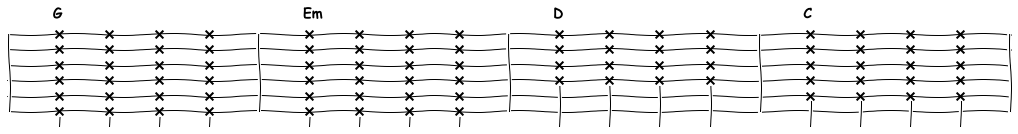

In [77]:
plt.xkcd()
fig, ax = plt.subplots(figsize=(18,2))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('TAB')
plt.ylim(0,7)
plt.xlim(-0.03,16.03)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right = False
)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.gca().invert_yaxis()

for s in range(1, 7):
    plt.axhline(y = s, color='k', lw=1, zorder=0)
for m in range(0,17,4):
    plt.axvline(x = m, color='k',  lw=1, zorder=1, ymin=1/7, ymax=6/7)


for i, x in enumerate(np.linspace(0, 4, 5, False)[1:]):
    for j, y in  enumerate([1,2,3,4,5,6]):
        if i == 0 and j == 0:
            plt.text(x-0.1, y-1, 'G', weight="bold")
        plt.scatter(x, y, s=60, marker='x', color='k',  zorder=5)
    plt.axvline(x = x, color='k',  lw=1, ymin = 0, ymax = (7-y)/7 -0.05)
        
for i, x in enumerate(np.linspace(4, 8, 5, False)[1:]):
    for j, y in enumerate([1,2,3,4,5,6]):
        if i == 0 and j == 0:
            plt.text(x-0.1, y-1, 'Em', weight="bold")
        plt.scatter(x, y, s=60, marker='x', color='k',  zorder=5)
    plt.axvline(x = x, color='k',  lw=1, ymin = 0, ymax = (7-y)/7 -0.05)
        
for i, x in enumerate(np.linspace(8, 12, 5, False)[1:]):
    for j, y in enumerate([1,2,3,4]):
        if i == 0 and j == 0:
            plt.text(x-0.1, y-1, 'D', weight="bold")
        plt.scatter(x, y, s=60, marker='x', color='k',  zorder=5)
    plt.axvline(x = x, color='k',  lw=1, ymin = 0, ymax = (7-y)/7 -0.05)

for i, x in enumerate(np.linspace(12, 16, 5, False)[1:]):
    for j, y in enumerate([1,2,3,4,5]):
        if i == 0 and j == 0:
            plt.text(x-0.1, y-1, 'C', weight="bold")
        plt.scatter(x, y, s=60, marker='x', color='k',  zorder=5)
    plt.axvline(x = x, color='k',  lw=1, ymin = 0, ymax = (7-y)/7 -0.05)
        
plt.show()

In [78]:
playChord(G, interval=0.5, pattern=[[6,5,4,3,2,1], [6,5,4,3,2,1], [6,5,4,3,2,1], [6,5,4,3,2,1]])
playChord(Em, interval=0.5, pattern=[[6,5,4,3,2,1], [6,5,4,3,2,1], [6,5,4,3,2,1], [6,5,4,3,2,1]])
playChord(D, interval=0.5, pattern=[[4,3,2,1], [4,3,2,1], [4,3,2,1], [4,3,2,1]])
playChord(C, interval=0.5, pattern=[[6,5,4,3,2,1], [6,5,4,3,2,1], [6,5,4,3,2,1], [6,5,4,3,2,1]])

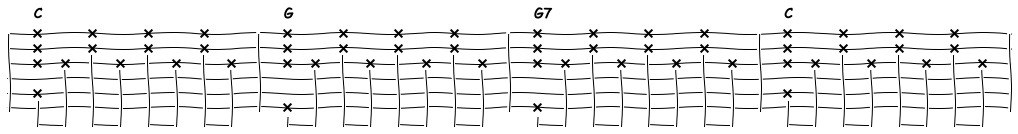

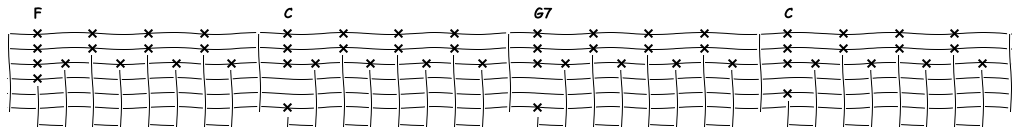

In [79]:
plt.xkcd()
fig, ax = plt.subplots(figsize=(18,2))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('TAB')
plt.ylim(0,7.3)
plt.xlim(-0.03,16.03)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right = False
)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.gca().invert_yaxis()

for s in range(1, 7):
    plt.axhline(y = s, color='k', lw=1, zorder=0)
for m in range(0,17,4):
    plt.axvline(x = m, color='k',  lw=1, zorder=1, ymin=1/7, ymax=6/7)


xs = np.linspace(0, 4, 9, False)[1:]
plt.text(xs[0]-0.05, 0, 'C', weight="bold")
for i, p in enumerate([[5, 3, 2, 1], 3, [2,1], 3, [2,1], 3, [2,1], 3]):
    if type(p) == list:
        plt.scatter(np.ones(len(p)) * xs[i], np.array(p), s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p[0])/7 -0.05)
    else:
        plt.scatter(xs[i], p, s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p)/7 -0.05)

for i in range(0, xs.size, 2):
    plt.plot([xs[i], xs[i+1]], [7.1, 7.1],  'k-', lw=1,zorder=0)
    
xs = np.linspace(4, 8, 9, False)[1:]
plt.text(xs[0]-0.05, 0, 'G', weight="bold")
for i, p in enumerate([[6, 3, 2, 1], 3, [2,1], 3, [2,1], 3, [2,1], 3]):
    if type(p) == list:
        plt.scatter(np.ones(len(p)) * xs[i], np.array(p), s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p[0])/7 -0.05)
    else:
        plt.scatter(xs[i], p, s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p)/7 -0.05)

for i in range(0, xs.size, 2):
    plt.plot([xs[i], xs[i+1]], [7.1, 7.1],  'k-', lw=1,zorder=0)
    
xs = np.linspace(8, 12, 9, False)[1:]
plt.text(xs[0]-0.05, 0, 'G7', weight="bold")
for i, p in enumerate([[6, 3, 2, 1], 3, [2, 1], 3, [2,1], 3, [2,1], 3]):
    if type(p) == list:
        plt.scatter(np.ones(len(p)) * xs[i], np.array(p), s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p[0])/7 -0.05)
    else:
        plt.scatter(xs[i], p, s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p)/7 -0.05)

for i in range(0, xs.size, 2):
    plt.plot([xs[i], xs[i+1]], [7.1, 7.1],  'k-', lw=1,zorder=0)
    
xs = np.linspace(12, 16, 9, False)[1:]
plt.text(xs[0]-0.05, 0, 'C', weight="bold")
for i, p in enumerate([[5, 3, 2, 1], 3, [2, 1], 3, [2,1], 3, [2, 1], 3]):
    if type(p) == list:
        plt.scatter(np.ones(len(p)) * xs[i], np.array(p), s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p[0])/7 -0.05)
    else:
        plt.scatter(xs[i], p, s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p)/7 -0.05)

for i in range(0, xs.size, 2):
    plt.plot([xs[i], xs[i+1]], [7.1, 7.1],  'k-', lw=1,zorder=0)
        
plt.show()



plt.xkcd()
fig, ax = plt.subplots(figsize=(18,2))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('TAB')
plt.ylim(0,7.3)
plt.xlim(-0.03,16.03)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right = False
)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.gca().invert_yaxis()

for s in range(1, 7):
    plt.axhline(y = s, color='k', lw=1, zorder=0)
for m in range(0,17,4):
    plt.axvline(x = m, color='k',  lw=1, zorder=1, ymin=1/7, ymax=6/7)


xs = np.linspace(0, 4, 9, False)[1:]
plt.text(xs[0]-0.05, 0, 'F', weight="bold")
for i, p in enumerate([[4, 3, 2, 1], 3, [2,1], 3, [2,1], 3, [2,1], 3]):
    if type(p) == list:
        plt.scatter(np.ones(len(p)) * xs[i], np.array(p), s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p[0])/7 -0.05)
    else:
        plt.scatter(xs[i], p, s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p)/7 -0.05)

for i in range(0, xs.size, 2):
    plt.plot([xs[i], xs[i+1]], [7.1, 7.1],  'k-', lw=1,zorder=0)
    
xs = np.linspace(4, 8, 9, False)[1:]
plt.text(xs[0]-0.05, 0, 'C', weight="bold")
for i, p in enumerate([[6, 3, 2, 1], 3, [2,1], 3, [2,1], 3, [2,1], 3]):
    if type(p) == list:
        plt.scatter(np.ones(len(p)) * xs[i], np.array(p), s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p[0])/7 -0.05)
    else:
        plt.scatter(xs[i], p, s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p)/7 -0.05)

for i in range(0, xs.size, 2):
    plt.plot([xs[i], xs[i+1]], [7.1, 7.1],  'k-', lw=1,zorder=0)
    
xs = np.linspace(8, 12, 9, False)[1:]
plt.text(xs[0]-0.05, 0, 'G7', weight="bold")
for i, p in enumerate([[6, 3, 2, 1], 3, [2, 1], 3, [2,1], 3, [2,1], 3]):
    if type(p) == list:
        plt.scatter(np.ones(len(p)) * xs[i], np.array(p), s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p[0])/7 -0.05)
    else:
        plt.scatter(xs[i], p, s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p)/7 -0.05)

for i in range(0, xs.size, 2):
    plt.plot([xs[i], xs[i+1]], [7.1, 7.1],  'k-', lw=1,zorder=0)
    
xs = np.linspace(12, 16, 9, False)[1:]
plt.text(xs[0]-0.05, 0, 'C', weight="bold")
for i, p in enumerate([[5, 3, 2, 1], 3, [2, 1], 3, [2,1], 3, [2, 1], 3]):
    if type(p) == list:
        plt.scatter(np.ones(len(p)) * xs[i], np.array(p), s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p[0])/7 -0.05)
    else:
        plt.scatter(xs[i], p, s=60, marker='x', color='k',  zorder=5)
        plt.axvline(x = xs[i], color='k',  lw=1, ymin = 0, ymax = (7-p)/7 -0.05)

for i in range(0, xs.size, 2):
    plt.plot([xs[i], xs[i+1]], [7.1, 7.1],  'k-', lw=1,zorder=0)
        
plt.show()

In [84]:
#  Hey Jude
tempo = 70
capo = 12
interval = (60/tempo) / 2
for c in range(4):
    play('E', duration=0.5, capo=capo)
    time.sleep(interval*2)
for i in range(2):
    playChord(C, interval=interval, capo=capo, pattern=[[5, 3, 2, 1], 3, [1,2], 3, [1, 2], 3, [1,2], 3])
    playChord(G, interval=interval, capo=capo, pattern=[[4, 3, 2, 1], 3, [1, 2], 3, [1, 2], 3, [1,2], 3])
    playChord(G7, interval=interval, capo=capo, pattern=[[4, 3, 2, 1], 3, [1, 2], 3, [1, 2], 3, [1,2], 3])
    playChord(C, interval=interval, capo=capo, pattern=[[5, 3, 2, 1], 3, [1, 2], 3, [1, 2], 3, [1,2], 3])
    playChord(F, interval=interval, capo=capo, pattern=[[4, 3, 2, 1], 3, [1, 2], 3, [1, 2], 3, [1,2], 3])
    playChord(C, interval=interval, capo=capo, pattern=[[5, 3, 2, 1], 3, [1, 2], 3, [1, 2], 3, [1,2], 3])
    playChord(G7, interval=interval, capo=capo, pattern=[[4, 3, 2, 1], 3, [1, 2], 3, [1, 2], 3, [1,2], 3])
    playChord(C, interval=interval, capo=capo, pattern=[[5, 3, 2, 1], 3, [1, 2], 3, [1, 2], 3, [1,2], 3])